<a href="https://colab.research.google.com/github/Aratrika93/Kapoor/blob/main/Aratrika_Basu_ProblemSet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title #Importing libraries & uploading csv file
#Importing libraries & uploading csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf

In [171]:
from google.colab import files 
uploaded = files.upload()
import io 
train_data = pd.read_csv(io.BytesIO(uploaded['ps6_trainvalid.csv'])) 

Saving ps6_trainvalid.csv to ps6_trainvalid (2).csv


In [172]:
train_data

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45008,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
45009,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
45010,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0
45011,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,324.0,0.0


In [173]:
#@title #Data Exploration & Preprocessing
#Data Exploration & Preprocessing

In [174]:
train_data1 = train_data
test_data1 = test_data

In [175]:
train_data.describe()

,temperature,humidity,pressure,wind_direction,wind_speed
count,45010.000000,44861.000000,44761.000000,45012.000000,45012.000000
mean,290.841547,62.823767,1015.915127,139.733804,1.220652
std,6.465152,21.786687,11.316175,105.545576,1.435687
min,266.503667,5.000000,886.000000,0.000000,0.000000
25%,286.370000,48.000000,1013.000000,29.000000,0.000000
50%,290.530000,66.000000,1016.000000,140.000000,1.000000
75%,295.080000,81.000000,1021.000000,230.000000,2.000000
max,315.470000,100.000000,1044.000000,360.000000,17.000000


In [176]:
train_data.isnull().sum()

datetime            0
temperature         3
humidity          152
pressure          252
weather             1
wind_direction      1
wind_speed          1
dtype: int64

In [177]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45013 entries, 0 to 45012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        45013 non-null  object 
 1   temperature     45010 non-null  float64
 2   humidity        44861 non-null  float64
 3   pressure        44761 non-null  float64
 4   weather         45012 non-null  object 
 5   wind_direction  45012 non-null  float64
 6   wind_speed      45012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [178]:
#Replacing the null elements of temperature, humidity & pressure with their mean

In [179]:
temp_mean = train_data['temperature'].mean()
humidity_mean = train_data['humidity'].mean()
pressure_mean = train_data['pressure'].mean()

temp_mean, humidity_mean, pressure_mean

(290.8415471739306, 62.82376674617151, 1015.9151270078863)

In [180]:
train_data = train_data.fillna(value = {'temperature' : temp_mean, 'humidity' : humidity_mean, 'pressure' : pressure_mean})


In [181]:
train_data 

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 12:00:00,290.841547,62.823767,1015.915127,NaN,NaN,NaN
1,2012-10-01 13:00:00,291.870000,88.000000,1013.000000,mist,0.0,0.0
2,2012-10-01 14:00:00,291.868186,88.000000,1013.000000,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,291.862844,88.000000,1013.000000,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,291.857503,88.000000,1013.000000,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45008,2017-11-19 20:00:00,295.440000,17.000000,1017.000000,sky is clear,345.0,1.0
45009,2017-11-19 21:00:00,296.020000,16.000000,1016.000000,sky is clear,345.0,1.0
45010,2017-11-19 22:00:00,296.510000,17.000000,1015.000000,sky is clear,345.0,1.0
45011,2017-11-19 23:00:00,297.090000,17.000000,1014.000000,sky is clear,324.0,0.0


In [182]:
train_data.isnull().sum()

datetime          0
temperature       0
humidity          0
pressure          0
weather           1
wind_direction    1
wind_speed        1
dtype: int64

In [183]:
#Dropping the single record(1st record) which has null vaue for wind_direction & wind_speed

In [184]:
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)

In [185]:
train_data

,datetime,temperature,humidity,pressure,weather,wind_direction,wind_speed
0,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.0,0.0
1,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.0,0.0
2,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.0,0.0
3,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.0,0.0
4,2012-10-01 17:00:00,291.852162,88.0,1013.0,sky is clear,0.0,0.0
...,...,...,...,...,...,...,...
45007,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,345.0,1.0
45008,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,345.0,1.0
45009,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,345.0,1.0
45010,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,324.0,0.0


In [186]:
#@title #Feature Engineering
#Feature Engineering

In [187]:
#Wind direction

Text(0, 0.5, 'Wind Speed')

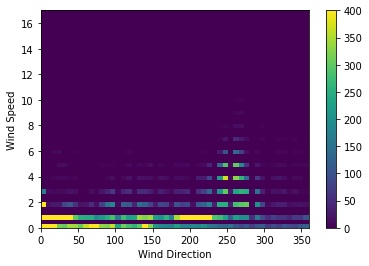

In [188]:
#Plot for existing wind direction & wind speed
plt.hist2d(train_data['wind_direction'], train_data['wind_speed'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed')

In [189]:
ws = train_data.pop('wind_speed')

# Convert to radians.
wd_rad = train_data.pop('wind_direction')*np.pi / 180

# Calculate the wind x and y components.
train_data['Wx'] = ws*np.cos(wd_rad)
train_data['Wy'] = ws*np.sin(wd_rad)


In [190]:
#Transformed traininig data
train_data

,datetime,temperature,humidity,pressure,weather,Wx,Wy
0,2012-10-01 13:00:00,291.870000,88.0,1013.0,mist,0.000000,0.000000
1,2012-10-01 14:00:00,291.868186,88.0,1013.0,sky is clear,0.000000,0.000000
2,2012-10-01 15:00:00,291.862844,88.0,1013.0,sky is clear,0.000000,0.000000
3,2012-10-01 16:00:00,291.857503,88.0,1013.0,sky is clear,0.000000,0.000000
4,2012-10-01 17:00:00,291.852162,88.0,1013.0,sky is clear,0.000000,0.000000
...,...,...,...,...,...,...,...
45007,2017-11-19 20:00:00,295.440000,17.0,1017.0,sky is clear,0.965926,-0.258819
45008,2017-11-19 21:00:00,296.020000,16.0,1016.0,sky is clear,0.965926,-0.258819
45009,2017-11-19 22:00:00,296.510000,17.0,1015.0,sky is clear,0.965926,-0.258819
45010,2017-11-19 23:00:00,297.090000,17.0,1014.0,sky is clear,0.000000,-0.000000


(-11.0, 13.0, -15.974774553360445, 10.724622203665692)

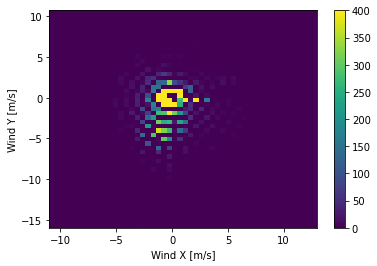

In [191]:
#Plot for transformed wind direction & wind speed
plt.hist2d(train_data['Wx'], train_data['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [192]:
#Datetime

In [193]:
#Checking the type of datatime column
type(train_data['datetime'][0])

str

In [194]:
#Converting from string to datetime
import datetime
date_time = pd.to_datetime(train_data.pop('datetime'), format='%Y.%m.%d %H:%M:%S')
date_time

0       2012-10-01 13:00:00
1       2012-10-01 14:00:00
2       2012-10-01 15:00:00
3       2012-10-01 16:00:00
4       2012-10-01 17:00:00
                ...        
45007   2017-11-19 20:00:00
45008   2017-11-19 21:00:00
45009   2017-11-19 22:00:00
45010   2017-11-19 23:00:00
45011   2017-11-20 00:00:00
Name: datetime, Length: 45012, dtype: datetime64[ns]

In [195]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [196]:
day = 24*60*60
year = (365.2425)*day

train_data['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
train_data['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
train_data['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
train_data['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

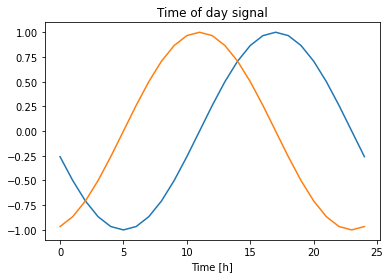

In [197]:
#Training data plot for datetime
plt.plot(np.array(train_data['Day sin'])[:25])
plt.plot(np.array(train_data['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of year signal')

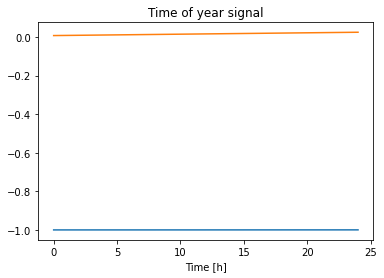

In [198]:
#Training data plot for datetime
plt.plot(np.array(train_data['Year sin'])[:25])
plt.plot(np.array(train_data['Year cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of year signal')

In [199]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45012 entries, 0 to 45011
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  45012 non-null  float64
 1   humidity     45012 non-null  float64
 2   pressure     45012 non-null  float64
 3   weather      45012 non-null  object 
 4   Wx           45012 non-null  float64
 5   Wy           45012 non-null  float64
 6   Day sin      45012 non-null  float64
 7   Day cos      45012 non-null  float64
 8   Year sin     45012 non-null  float64
 9   Year cos     45012 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


In [200]:
#Weather

In [201]:
#Exploring the categorical variable 'weather'
train_data['weather'].value_counts()

sky is clear                    25983
haze                             3490
mist                             2938
broken clouds                    2564
overcast clouds                  2432
scattered clouds                 2266
light rain                       1946
few clouds                       1754
fog                               560
moderate rain                     481
smoke                             203
heavy intensity rain              127
light intensity drizzle           102
dust                               64
proximity thunderstorm             25
very heavy rain                    20
thunderstorm                       17
thunderstorm with light rain       13
shower rain                         8
drizzle                             5
proximity shower rain               4
squalls                             3
light intensity shower rain         3
thunderstorm with heavy rain        2
thunderstorm with rain              2
Name: weather, dtype: int64

In [202]:
#Applying custom binary encoding & adding a new column "Rain?" for it 
searchfor = ['rain', 'clouds', 'thunderstorm']
train_data["Rain?"] = np.where(train_data["weather"].str.contains('|'.join(searchfor)), 1, 0)

In [203]:
train_data

,temperature,humidity,pressure,weather,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Rain?
0,291.870000,88.0,1013.0,mist,0.000000,0.000000,-2.588190e-01,-0.965926,-0.999973,0.007308,0
1,291.868186,88.0,1013.0,sky is clear,0.000000,0.000000,-5.000000e-01,-0.866025,-0.999968,0.008024,0
2,291.862844,88.0,1013.0,sky is clear,0.000000,0.000000,-7.071068e-01,-0.707107,-0.999962,0.008741,0
3,291.857503,88.0,1013.0,sky is clear,0.000000,0.000000,-8.660254e-01,-0.500000,-0.999955,0.009458,0
4,291.852162,88.0,1013.0,sky is clear,0.000000,0.000000,-9.659258e-01,-0.258819,-0.999948,0.010175,0
...,...,...,...,...,...,...,...,...,...,...,...
45007,295.440000,17.0,1017.0,sky is clear,0.965926,-0.258819,-8.660254e-01,0.500000,-0.658776,0.752339,0
45008,296.020000,16.0,1016.0,sky is clear,0.965926,-0.258819,-7.071068e-01,0.707107,-0.658237,0.752811,0
45009,296.510000,17.0,1015.0,sky is clear,0.965926,-0.258819,-5.000000e-01,0.866025,-0.657697,0.753283,0
45010,297.090000,17.0,1014.0,sky is clear,0.000000,-0.000000,-2.588190e-01,0.965926,-0.657157,0.753754,0


In [204]:
train_data[train_data['Rain?'].eq(1)]

,temperature,humidity,pressure,weather,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Rain?
86,294.260,88.0,1015.000000,few clouds,-1.836970e-16,-1.000000,0.707107,7.071068e-01,-0.997624,0.068896,1
87,293.470,88.0,1016.000000,few clouds,0.000000e+00,0.000000,0.866025,5.000000e-01,-0.997574,0.069611,1
88,292.570,82.0,1016.000000,overcast clouds,-1.836970e-16,-1.000000,0.965926,2.588190e-01,-0.997524,0.070326,1
89,291.040,82.0,1017.000000,scattered clouds,1.736482e-01,-0.984808,1.000000,1.052401e-11,-0.997473,0.071041,1
90,290.005,81.0,1015.915127,scattered clouds,2.298133e+00,-1.928363,0.965926,-2.588190e-01,-0.997422,0.071756,1
...,...,...,...,...,...,...,...,...,...,...,...
44959,293.980,60.0,1018.000000,scattered clouds,-4.067366e-01,-0.913545,-0.866025,5.000000e-01,-0.684266,0.729233,1
44968,290.320,88.0,1019.000000,broken clouds,-1.285575e+00,-1.532089,0.965926,2.588190e-01,-0.679547,0.733632,1
44969,289.570,87.0,1019.000000,broken clouds,3.420201e-01,-0.939693,1.000000,4.913993e-12,-0.679021,0.734119,1
44970,289.380,87.0,1020.000000,broken clouds,-1.026060e+00,-2.819078,0.965926,-2.588190e-01,-0.678495,0.734605,1


In [205]:
#Dropping the categorical variable weather
train_data1 = train_data.drop('weather', axis=1)
train_data1

,temperature,humidity,pressure,Wx,Wy,Day sin,Day cos,Year sin,Year cos,Rain?
0,291.870000,88.0,1013.0,0.000000,0.000000,-2.588190e-01,-0.965926,-0.999973,0.007308,0
1,291.868186,88.0,1013.0,0.000000,0.000000,-5.000000e-01,-0.866025,-0.999968,0.008024,0
2,291.862844,88.0,1013.0,0.000000,0.000000,-7.071068e-01,-0.707107,-0.999962,0.008741,0
3,291.857503,88.0,1013.0,0.000000,0.000000,-8.660254e-01,-0.500000,-0.999955,0.009458,0
4,291.852162,88.0,1013.0,0.000000,0.000000,-9.659258e-01,-0.258819,-0.999948,0.010175,0
...,...,...,...,...,...,...,...,...,...,...
45007,295.440000,17.0,1017.0,0.965926,-0.258819,-8.660254e-01,0.500000,-0.658776,0.752339,0
45008,296.020000,16.0,1016.0,0.965926,-0.258819,-7.071068e-01,0.707107,-0.658237,0.752811,0
45009,296.510000,17.0,1015.0,0.965926,-0.258819,-5.000000e-01,0.866025,-0.657697,0.753283,0
45010,297.090000,17.0,1014.0,0.000000,-0.000000,-2.588190e-01,0.965926,-0.657157,0.753754,0


In [206]:
#spliting the data
column_indices = {name: i for i, name in enumerate(train_data1.columns)}

n = len(train_data1)
train_set = train_data1[0:int(n*0.7)]
val_set = train_data1[int(n*0.7):int(n*0.9)]
test_set = train_data1[int(n*0.9):]

num_features = train_data1.shape[1]

In [207]:
train_set.shape, val_set.shape, test_set.shape

((31508, 10), (9002, 10), (4502, 10))

In [208]:
#Normalization
train_mean = train_set.mean()
train_std = train_set.std()

train_set = (train_set - train_mean) / train_std
val_set = (val_set - train_mean) / train_std
test_set = (test_set - train_mean) / train_std

In [209]:
#@title #Data Windowing
#Data Windowing

In [210]:
#Defining Window Generator

In [211]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_set, val_df=val_set,test_df= test_set,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [212]:
#Split

In [213]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [214]:
#Plotting

In [215]:
def plot(self, model=None, plot_col='temperature', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [216]:
#Creating Dataset

In [217]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [218]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [219]:
#@title #Model Building


In [220]:
#@title #SingleOutput Models
#SingleOutput Models

In [221]:
#@title #Singlestep-Single Output Model (Baseline Model) 
#Singlestep-Single Output Model (Baseline Model) 

In [222]:
#Predicting 1 timestep (1h) in the future only for "temperature"
#With a narrow window that generates 1h of consecutive inputs and labels at a time

In [223]:
#Defining Single Window
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['temperature'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['temperature']

In [224]:
#Input & Label shape
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 10)
Labels shape (batch, time, features): (32, 1, 1)


In [225]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [226]:
#Model evaluation with single narrow window
baseline = Baseline(label_index=column_indices['temperature'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

282/282 [==============================] - 1s 4ms/step - loss: 0.0584 - mean_absolute_error: 0.1475


In [227]:
#Predicting 1 timestep (1h) in the future only for "temperature" 
#With a wider window that generates 24h of consecutive inputs and labels at a time

In [228]:
#Defining wider window
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['temperature'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['temperature']

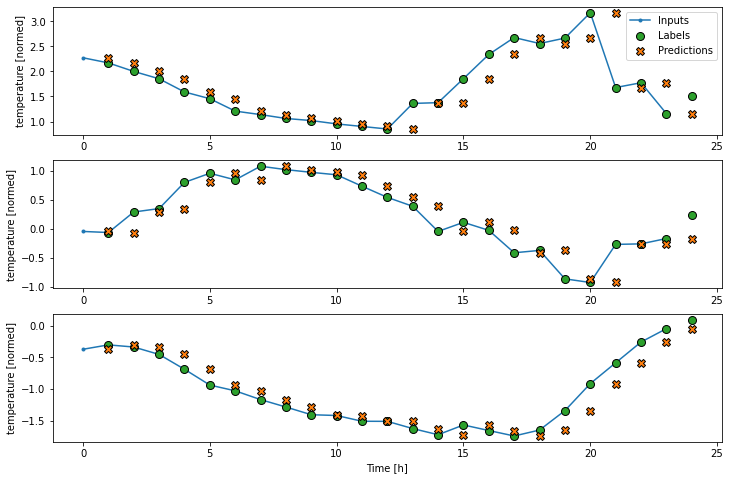

In [229]:
#Model evaluation with wider window
wide_window.plot(baseline)

In [230]:
#@title #Singlestep-Single Output Model(Linear model)
#Singlestep-Single Output Model(Linear model)

In [231]:
#Linear Layer
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [232]:
#Defininig the model
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [233]:
#Training & validation
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
985/985 [==============================] - 6s 5ms/step - loss: 1.0838 - mean_absolute_error: 0.7834 - val_loss: 0.1036 - val_mean_absolute_error: 0.2275
Epoch 2/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0592 - mean_absolute_error: 0.1774 - val_loss: 0.0362 - val_mean_absolute_error: 0.1217
Epoch 3/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0450 - mean_absolute_error: 0.1452 - val_loss: 0.0353 - val_mean_absolute_error: 0.1174
Epoch 4/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0447 - mean_absolute_error: 0.1428 - val_loss: 0.0352 - val_mean_absolute_error: 0.1164
Epoch 5/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0447 - mean_absolute_error: 0.1423 - val_loss: 0.0351 - val_mean_absolute_error: 0.1163
Epoch 6/20
985/985 [==============================] - 5s 5ms/step - loss: 0.0447 - mean_absolute_error: 0.1423 - val_loss: 0.0351 - val_mean_absolute_error: 0.1165
Epoch 7/20
282/2

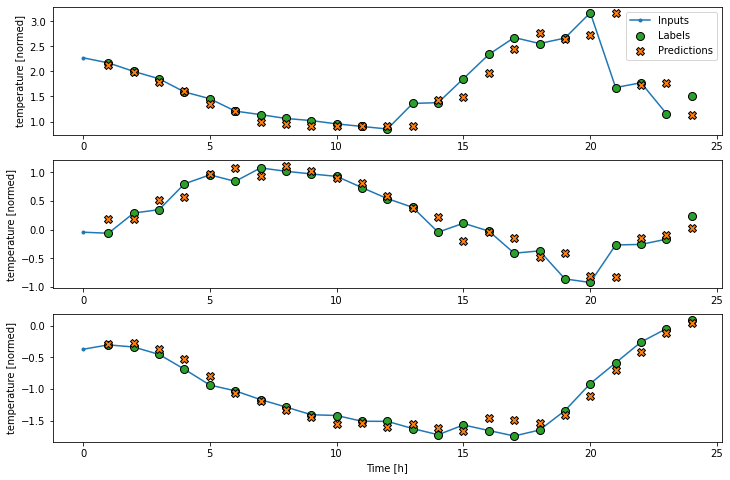

In [234]:
#Pllotting the model output with wider window
wide_window.plot(linear)

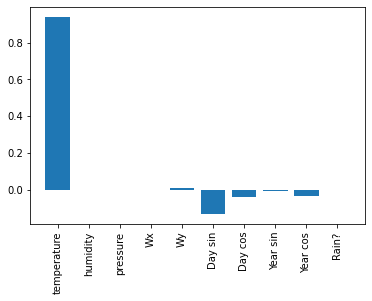

In [235]:
#Weightage assigned by the Linear model
plt.bar(x = range(len(train_set.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_set.columns)))
_ = axis.set_xticklabels(train_set.columns, rotation=90)

In [236]:
#@title #Multistep-Single Output Model(CNN)
#Multistep-Single Output Model(CNN)

In [237]:
#Defining Convolutional Window
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['temperature'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['temperature']

Text(0.5, 1.0, 'Taking input of past 3h, predicting 1h into the future.')

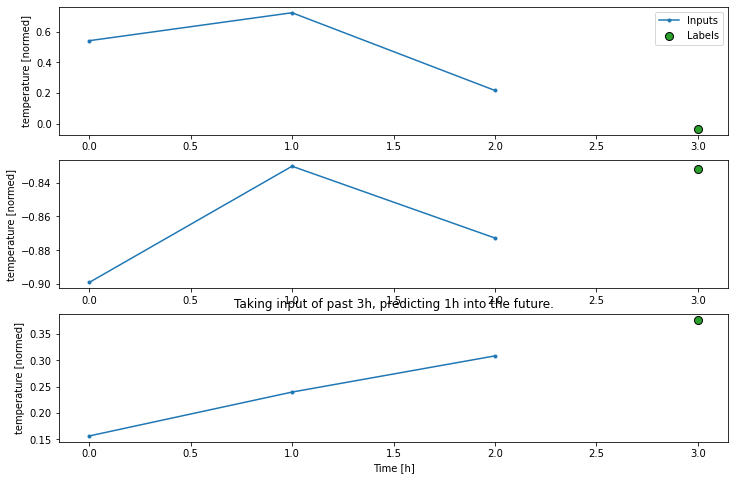

In [238]:
conv_window.plot()
plt.title("Taking input of past 3h, predicting 1h into the future.")

In [239]:
#convolution Layer
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [240]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 10)
Output shape: (32, 1, 1)


In [241]:
#Traing & evaluation
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/20
985/985 [==============================] - 6s 6ms/step - loss: 0.1549 - mean_absolute_error: 0.2576 - val_loss: 0.0508 - val_mean_absolute_error: 0.1503
Epoch 2/20
985/985 [==============================] - 6s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.1398 - val_loss: 0.0479 - val_mean_absolute_error: 0.1409
Epoch 3/20
985/985 [==============================] - 6s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.1320 - val_loss: 0.0438 - val_mean_absolute_error: 0.1333
Epoch 4/20
985/985 [==============================] - 6s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.1269 - val_loss: 0.0447 - val_mean_absolute_error: 0.1336
Epoch 5/20
985/985 [==============================] - 6s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.1242 - val_loss: 0.0391 - val_mean_absolute_error: 0.1252
Epoch 6/20
985/985 [==============================] - 6s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.1216 - val_loss: 0.0385 - val_mean_absolute_error: 0.1242
Epoch 7/20
985/9

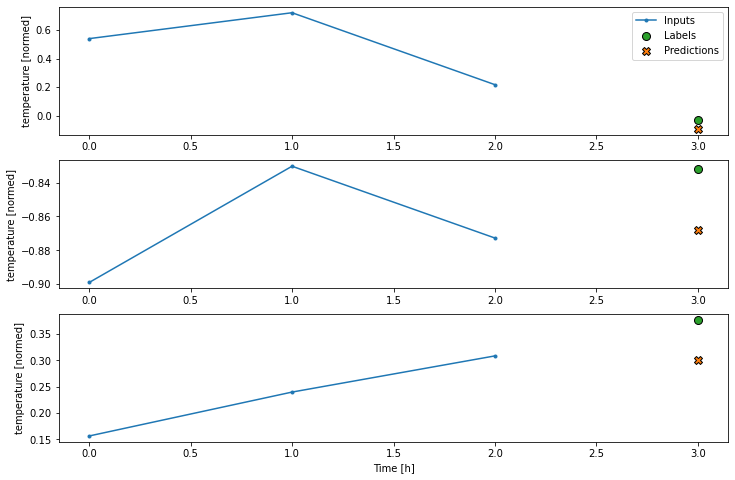

In [242]:
conv_window.plot(conv_model)

In [243]:
#@title #Multistep-Single Output Model(RNN-LSTM)
#Multistep-Single Output Model(RNN-LSTM)

In [244]:
#LSTM layer
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [245]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 10)
Output shape: (32, 24, 1)


In [246]:
#Training & Evaluation
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/20
984/984 [==============================] - 18s 16ms/step - loss: 0.1781 - mean_absolute_error: 0.2774 - val_loss: 0.0431 - val_mean_absolute_error: 0.1294
Epoch 2/20
984/984 [==============================] - 15s 15ms/step - loss: 0.0342 - mean_absolute_error: 0.1236 - val_loss: 0.0380 - val_mean_absolute_error: 0.1158
Epoch 3/20
984/984 [==============================] - 15s 15ms/step - loss: 0.0295 - mean_absolute_error: 0.1124 - val_loss: 0.0350 - val_mean_absolute_error: 0.1097
Epoch 4/20
984/984 [==============================] - 16s 16ms/step - loss: 0.0270 - mean_absolute_error: 0.1069 - val_loss: 0.0340 - val_mean_absolute_error: 0.1082
Epoch 5/20
984/984 [==============================] - 15s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.1019 - val_loss: 0.0338 - val_mean_absolute_error: 0.1077
Epoch 6/20
984/984 [==============================] - 15s 15ms/step - loss: 0.0232 - mean_absolute_error: 0.0983 - val_loss: 0.0355 - val_mean_absolute_error: 0.1101
Epoc

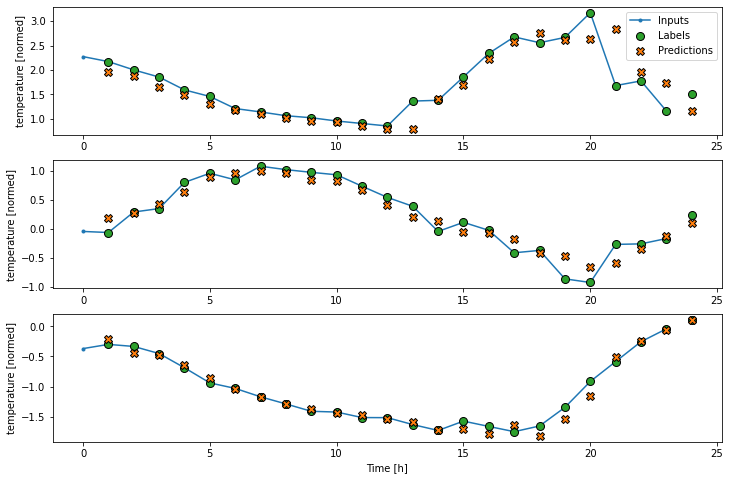

In [247]:
wide_window.plot(lstm_model)

In [248]:
#Performance of the single step - single output models above

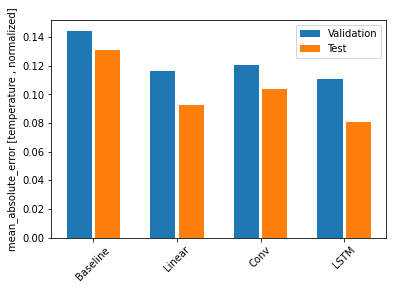

In [249]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [temperature , normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [250]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1314
Linear      : 0.0930
Conv        : 0.1039
LSTM        : 0.0807


In [251]:
#@title #Multioutput Models
#Multioutput Models

In [252]:
#@title #Singlestep-Multi Output Model (Baseline Model)
#Singlestep-Multi Output Model (Baseline Model) 

In [253]:
#Predicting 1 timestep (1h) in the future for ALL the features not just "temperature"
#With a narrow window that generates 1h of consecutive inputs and labels at a time
#With a wider window that generates 24h of consecutive inputs and labels at a time

In [254]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 10)
Labels shape (batch, time, features): (32, 24, 10)


In [255]:
#Model Training
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [256]:
#Evaluation
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

281/281 [==============================] - 1s 4ms/step - loss: 0.4083 - mean_absolute_error: 0.2616


In [257]:
#@title #Singlestep-Multi Output Model(Dense Model)
#Singlestep-Multi Output Model(Dense Model)

In [258]:
#Dense Layer
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [259]:
#Model Training & Evaluation
history = compile_and_fit(dense, single_step_window)


val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
985/985 [==============================] - 7s 6ms/step - loss: 0.3550 - mean_absolute_error: 0.3642 - val_loss: 0.3481 - val_mean_absolute_error: 0.2988
Epoch 2/20
985/985 [==============================] - 6s 6ms/step - loss: 0.2115 - mean_absolute_error: 0.2227 - val_loss: 0.3480 - val_mean_absolute_error: 0.2922
Epoch 3/20
985/985 [==============================] - 6s 6ms/step - loss: 0.2071 - mean_absolute_error: 0.2158 - val_loss: 0.3484 - val_mean_absolute_error: 0.2920
Epoch 4/20
985/985 [==============================] - 6s 6ms/step - loss: 0.2061 - mean_absolute_error: 0.2134 - val_loss: 0.3466 - val_mean_absolute_error: 0.2886
Epoch 5/20
985/985 [==============================] - 6s 6ms/step - loss: 0.2037 - mean_absolute_error: 0.2111 - val_loss: 0.3456 - val_mean_absolute_error: 0.2879
Epoch 6/20
985/985 [==============================] - 6s 6ms/step - loss: 0.2033 - mean_absolute_error: 0.2101 - val_loss: 0.3501 - val_mean_absolute_error: 0.2866
Epoch 7/20
282/2

In [260]:
#@title #Singlestep-Multi Output Model (RNN-LSTM model)
#Singlestep-Multi Output Model (RNN-LSTM model)

In [261]:
#Defining the wide window
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

#LSTM layer
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=num_features)
])

#Model Training & Evaluation
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

Epoch 1/20
984/984 [==============================] - 18s 16ms/step - loss: 0.4015 - mean_absolute_error: 0.4085 - val_loss: 0.3673 - val_mean_absolute_error: 0.3101
Epoch 2/20
984/984 [==============================] - 16s 16ms/step - loss: 0.2001 - mean_absolute_error: 0.2127 - val_loss: 0.3307 - val_mean_absolute_error: 0.2845
Epoch 3/20
984/984 [==============================] - 16s 16ms/step - loss: 0.1925 - mean_absolute_error: 0.2018 - val_loss: 0.3202 - val_mean_absolute_error: 0.2753
Epoch 4/20
984/984 [==============================] - 16s 16ms/step - loss: 0.1889 - mean_absolute_error: 0.1974 - val_loss: 0.3200 - val_mean_absolute_error: 0.2744
Epoch 5/20
984/984 [==============================] - 16s 17ms/step - loss: 0.1864 - mean_absolute_error: 0.1951 - val_loss: 0.3196 - val_mean_absolute_error: 0.2738
Epoch 6/20
984/984 [==============================] - 16s 16ms/step - loss: 0.1846 - mean_absolute_error: 0.1937 - val_loss: 0.3196 - val_mean_absolute_error: 0.2738
Epoc

In [262]:
#Performance of the single step - multi output models above

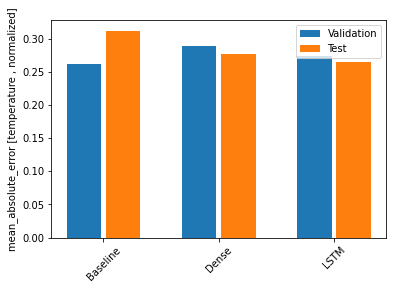

In [263]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [temperature , normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [264]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.3124
Dense          : 0.2772
LSTM           : 0.2656


In [265]:
#@title #Multi step-Multi Output Model 
#Multi step-Multi Output Model 

In [266]:
#Predicting 120 timestep (120h) in the future for ALL the features not just "temperature"
#With a multi window that generates 120h of consecutive inputs and labels at a time

Total window size: 216
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label indices: [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215]
Label column name(s): None

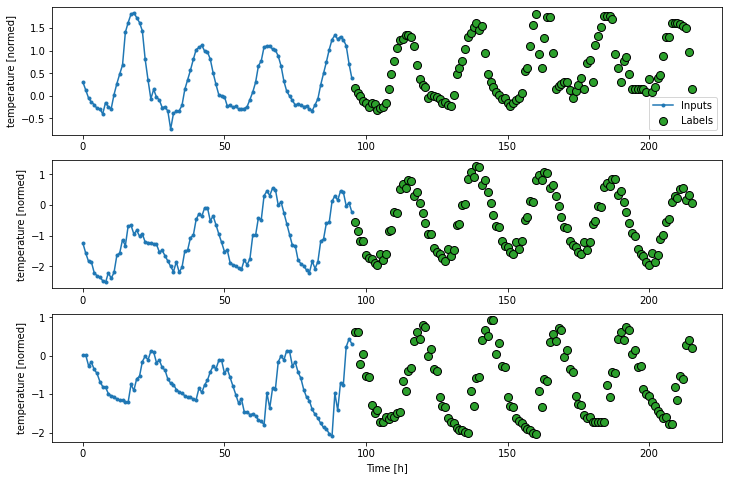

In [267]:
OUT_STEPS = 120
multi_window = WindowGenerator(input_width=96,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [268]:
#@title #Multi step-Multi Output Model (Baseline Model)
#Multi step-Multi Output Model (Baseline Model)

275/275 [==============================] - 1s 5ms/step - loss: 1.7489 - mean_absolute_error: 0.8032


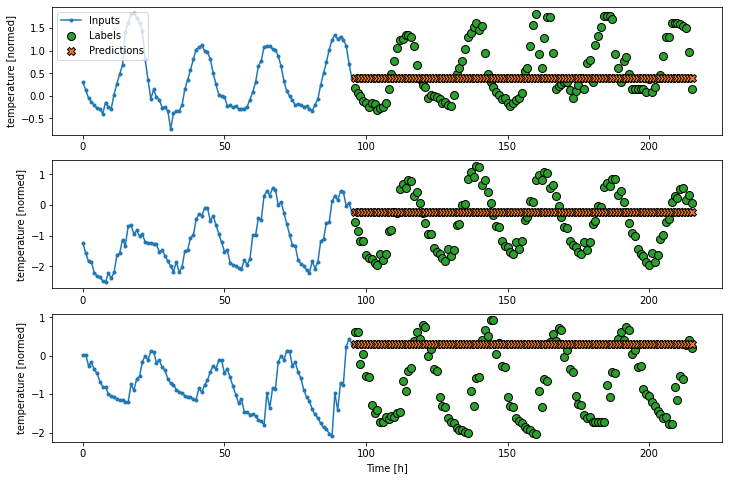

In [269]:
#Model to repeat the last input time step for the output timesteps
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

In [270]:
#@title #Multi step-Multi Output Model (Single-shot +Linear Model)
#Multi step-Multi Output Model (Single-shot +Linear Model)

Epoch 1/20
978/978 [==============================] - 7s 6ms/step - loss: 0.7036 - mean_absolute_error: 0.6481 - val_loss: 0.8599 - val_mean_absolute_error: 0.5428
Epoch 2/20
978/978 [==============================] - 6s 7ms/step - loss: 0.4291 - mean_absolute_error: 0.4146 - val_loss: 0.8089 - val_mean_absolute_error: 0.4717
Epoch 3/20
978/978 [==============================] - 6s 6ms/step - loss: 0.4141 - mean_absolute_error: 0.3651 - val_loss: 0.8053 - val_mean_absolute_error: 0.4514
Epoch 4/20
978/978 [==============================] - 6s 6ms/step - loss: 0.4131 - mean_absolute_error: 0.3532 - val_loss: 0.8048 - val_mean_absolute_error: 0.4487
Epoch 5/20
978/978 [==============================] - 6s 6ms/step - loss: 0.4127 - mean_absolute_error: 0.3516 - val_loss: 0.8058 - val_mean_absolute_error: 0.4487
Epoch 6/20
978/978 [==============================] - 6s 6ms/step - loss: 0.4134 - mean_absolute_error: 0.3518 - val_loss: 0.8046 - val_mean_absolute_error: 0.4484
Epoch 7/20
978/9

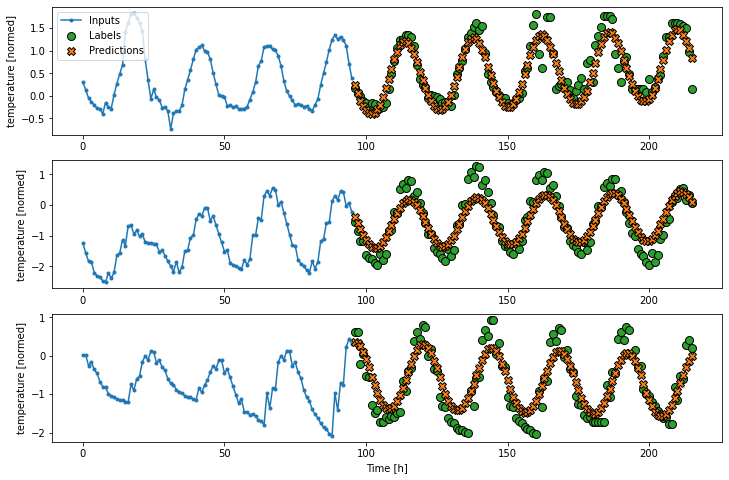

In [271]:
#Linear layer
multi_linear_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

#Model training & evaluation
history = compile_and_fit(multi_linear_model, multi_window)


multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [272]:
#@title #Multi step-Multi Output Model (Single-shot +Linear Model  with an additional dense layer)
#Multi step-Multi Output Model (Single-shot +Linear Model  with an additional dense layer)

Epoch 1/20
978/978 [==============================] - 15s 15ms/step - loss: 0.4596 - mean_absolute_error: 0.4136 - val_loss: 0.9862 - val_mean_absolute_error: 0.4690
Epoch 2/20
978/978 [==============================] - 15s 15ms/step - loss: 0.3863 - mean_absolute_error: 0.3412 - val_loss: 0.9816 - val_mean_absolute_error: 0.4700
Epoch 3/20
978/978 [==============================] - 15s 15ms/step - loss: 0.3823 - mean_absolute_error: 0.3391 - val_loss: 0.9832 - val_mean_absolute_error: 0.4680
Epoch 4/20
275/275 [==============================] - 2s 7ms/step - loss: 0.9964 - mean_absolute_error: 0.4673


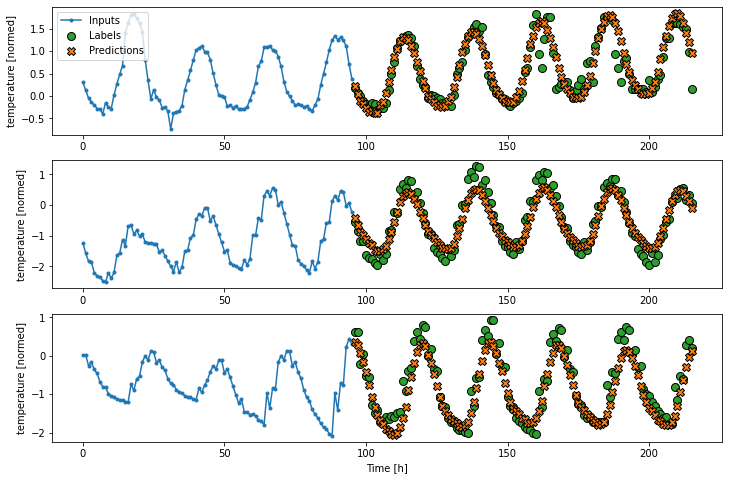

In [273]:
#Dense layer
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

#Model training & evaluation
history = compile_and_fit(multi_dense_model, multi_window)


multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [274]:
#@title #Multi step-Multi Output Model (Single-shot +CNN)
#Multi step-Multi Output Model (Single-shot +CNN)

Epoch 1/20
978/978 [==============================] - 11s 11ms/step - loss: 0.4640 - mean_absolute_error: 0.4191 - val_loss: 0.9560 - val_mean_absolute_error: 0.4690
Epoch 2/20
978/978 [==============================] - 11s 11ms/step - loss: 0.3836 - mean_absolute_error: 0.3421 - val_loss: 0.9671 - val_mean_absolute_error: 0.4700
Epoch 3/20
275/275 [==============================] - 2s 6ms/step - loss: 0.9681 - mean_absolute_error: 0.4708


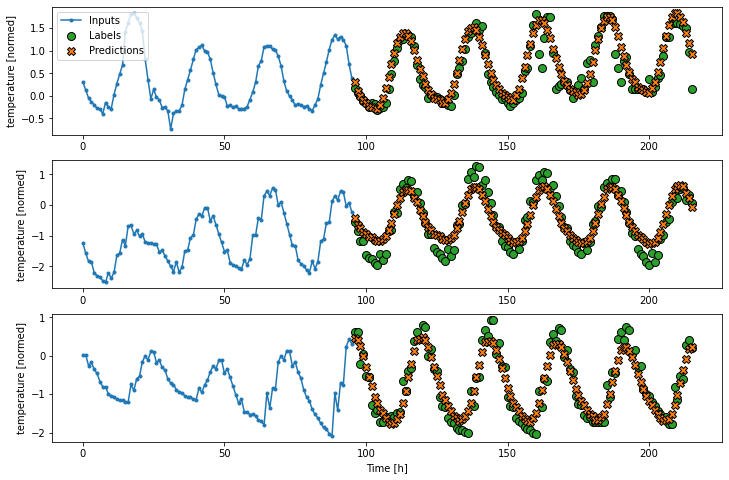

In [275]:
CONV_WIDTH = 3
#Convolutional Layer
multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

#Model training & evaluation
history = compile_and_fit(multi_conv_model, multi_window)


multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [276]:
#@title #Multi step-Multi Output Model (Single-shot +RNN-LSTM)
#Multi step-Multi Output Model (Single-shot +RNN-LSTM)

Epoch 1/20
978/978 [==============================] - 44s 43ms/step - loss: 0.5642 - mean_absolute_error: 0.5186 - val_loss: 0.9903 - val_mean_absolute_error: 0.5090
Epoch 2/20
978/978 [==============================] - 43s 44ms/step - loss: 0.3718 - mean_absolute_error: 0.3602 - val_loss: 0.9605 - val_mean_absolute_error: 0.4930
Epoch 3/20
978/978 [==============================] - 43s 44ms/step - loss: 0.3540 - mean_absolute_error: 0.3446 - val_loss: 0.9745 - val_mean_absolute_error: 0.4933
Epoch 4/20
275/275 [==============================] - 4s 13ms/step - loss: 0.9718 - mean_absolute_error: 0.4909


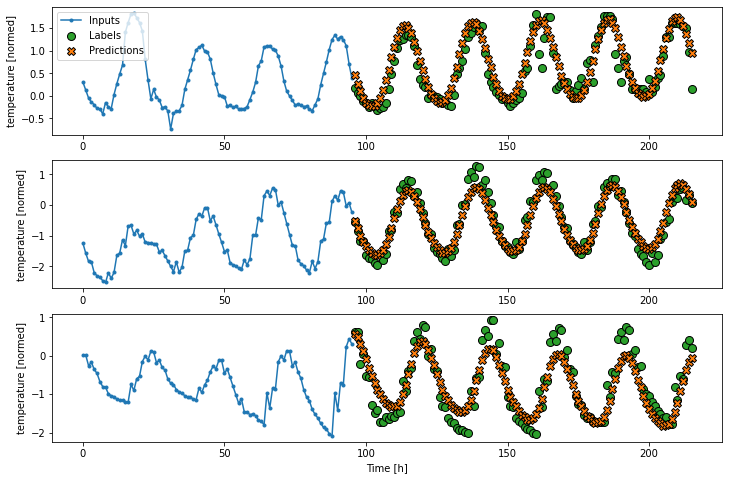

In [277]:
#LSTM Layer
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

#Model training & evaluation
history = compile_and_fit(multi_lstm_model, multi_window)



multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [278]:
#@title #Multi step-Multi Output Model (Autoregressive +RNN-LSTM)
#Multi step-Multi Output Model (Autoregressive +RNN-LSTM)

In [279]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [280]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [281]:
def warmup(self, inputs):
  x, *state = self.lstm_rnn(inputs)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [282]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 10])

In [283]:
def call(self, inputs, training=None):
  predictions = []
  prediction, state = self.warmup(inputs)

  predictions.append(prediction)

  
  for n in range(1, self.out_steps):
    
    x = prediction
    
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    
    prediction = self.dense(x)
    
    predictions.append(prediction)

  
  predictions = tf.stack(predictions)
  
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [284]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 120, 10)


Epoch 1/20
978/978 [==============================] - 97s 73ms/step - loss: 0.7210 - mean_absolute_error: 0.6310 - val_loss: 1.2289 - val_mean_absolute_error: 0.6374
Epoch 2/20
978/978 [==============================] - 69s 71ms/step - loss: 0.4462 - mean_absolute_error: 0.4213 - val_loss: 1.0439 - val_mean_absolute_error: 0.5190
Epoch 3/20
978/978 [==============================] - 69s 71ms/step - loss: 0.4067 - mean_absolute_error: 0.3835 - val_loss: 1.0434 - val_mean_absolute_error: 0.5139
Epoch 4/20
978/978 [==============================] - 69s 71ms/step - loss: 0.3993 - mean_absolute_error: 0.3769 - val_loss: 1.0402 - val_mean_absolute_error: 0.5188
Epoch 5/20
978/978 [==============================] - 69s 70ms/step - loss: 0.3933 - mean_absolute_error: 0.3730 - val_loss: 1.0411 - val_mean_absolute_error: 0.5156
Epoch 6/20
275/275 [==============================] - 6s 20ms/step - loss: 1.0406 - mean_absolute_error: 0.5206


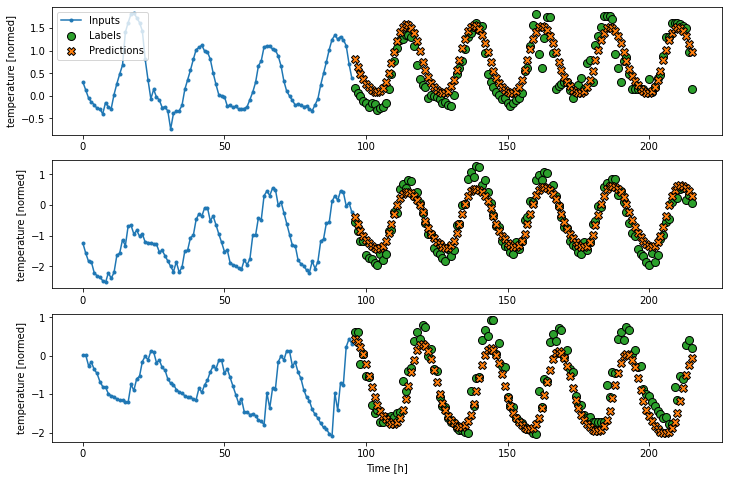

In [285]:
#Model training & evaluation
history = compile_and_fit(feedback_model, multi_window)


multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [289]:
#Performance of the multi step - multi output models above

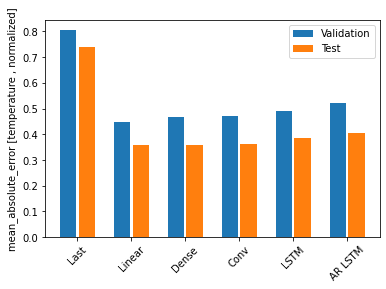

In [290]:
x = np.arange(len(multi_performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.ylabel('mean_absolute_error [temperature , normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
_ = plt.legend()

In [291]:
for name, value in multi_performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Last           : 0.7392
Linear         : 0.3570
Dense          : 0.3592
Conv           : 0.3623
LSTM           : 0.3864
AR LSTM        : 0.4035
